# Digit Recognizer 🔢

Dataset : MNIST data

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('/content/train.csv')

In [3]:
train.head(1)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X = train.iloc[:, 1:].values.reshape((len(train), 28, 28))
y = train.iloc[:, 0].values

In [5]:
len(X)

42000

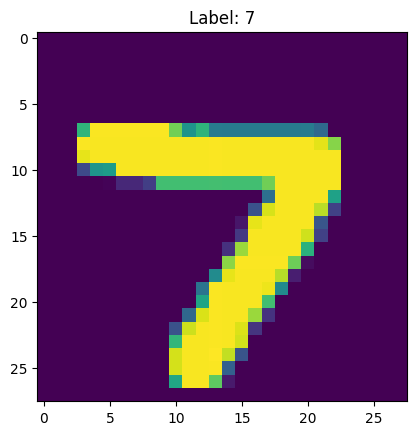

In [6]:
random_num = np.random.randint(0,42000)
sample = X[random_num, :]
sample_label = y[random_num]

plt.imshow(sample)
plt.title(f"Label: {sample_label}")
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

X = X / 255.0

X = np.expand_dims(X, axis=-1)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [50]:
inputs = tf.keras.layers.Input(shape=X_train[0].shape)

x = tf.keras.layers.Conv2D(32, 3, padding='same')(inputs)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Conv2D(32, 3, padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.MaxPooling2D()(x)
x = tf.keras.layers.Dropout(0.25)(x)

x = tf.keras.layers.Conv2D(64, 3, padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Conv2D(64, 3, padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.MaxPooling2D()(x)
x = tf.keras.layers.Dropout(0.25)(x)

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

In [51]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.003),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [52]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1050/1050 [==============================] - 10s 7ms/step - loss: 0.7882 - accuracy: 0.8256
Epoch 2/10
1050/1050 [==============================] - 6s 6ms/step - loss: 0.3635 - accuracy: 0.9259
Epoch 3/10
1050/1050 [==============================] - 7s 7ms/step - loss: 0.2936 - accuracy: 0.9488
Epoch 4/10
1050/1050 [==============================] - 6s 6ms/step - loss: 0.2569 - accuracy: 0.9580
Epoch 5/10
1050/1050 [==============================] - 7s 6ms/step - loss: 0.2465 - accuracy: 0.9614
Epoch 6/10
1050/1050 [==============================] - 6s 6ms/step - loss: 0.2303 - accuracy: 0.9663
Epoch 7/10
1050/1050 [==============================] - 7s 7ms/step - loss: 0.2165 - accuracy: 0.9687
Epoch 8/10
1050/1050 [==============================] - 6s 6ms/step - loss: 0.2222 - accuracy: 0.9692
Epoch 9/10
1050/1050 [==============================] - 7s 7ms/step - loss: 0.2089 - accuracy: 0.9706
Epoch 10/10
1050/1050 [==============================] - 6s 6ms/step - loss: 0.19

In [53]:
y_pred = model.predict(X_test)

263/263 [==============================] - 1s 2ms/step


In [54]:
y_pred

array([[6.6610500e-10, 5.2012333e-14, 8.7688212e-10, ..., 5.3719710e-14,
        1.0000000e+00, 1.9472495e-08],
       [9.4603177e-13, 9.9999642e-01, 9.9574420e-09, ..., 6.4619184e-07,
        1.9982944e-10, 2.7778441e-08],
       [2.4166698e-11, 1.6047531e-12, 6.2518691e-13, ..., 3.9999968e-06,
        3.2329153e-09, 9.9997842e-01],
       ...,
       [9.0423473e-24, 7.3945510e-16, 1.4626614e-13, ..., 6.1980902e-12,
        8.5458137e-14, 3.2941457e-14],
       [9.9975783e-01, 4.3622200e-10, 2.2908503e-06, ..., 5.3880362e-06,
        1.2895488e-06, 2.3120346e-04],
       [1.8148516e-08, 7.4595833e-12, 5.5117738e-10, ..., 1.7260143e-06,
        1.7057876e-07, 9.9999189e-01]], dtype=float32)

In [55]:
y_pred = np.argmax(y_pred, axis=1)

In [56]:
from sklearn.metrics import r2_score


r2_score(y_test, y_pred)

0.9856085947211789

1/1 [==============================] - 1s 560ms/step


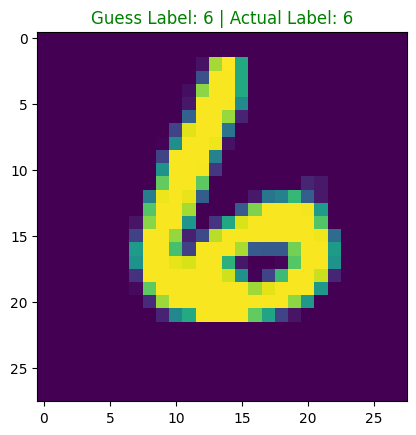

In [57]:
rand_num = np.random.randint(0, 8400)

guess = np.reshape(X_test[rand_num, :], (28, 28))

prediction = model.predict(np.expand_dims(X_test[rand_num], axis=0))
guess_label = np.argmax(prediction, axis=1)
actual_label = y_test[rand_num]

title_color = 'green' if guess_label[0] == actual_label else 'red'

plt.imshow(guess)
plt.title(f"Guess Label: {guess_label[0]} | Actual Label: {actual_label}", color=title_color)
plt.show()